In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the primary dataset 
netflix_path = "netflix_shows.csv"
netflix_data = pd.read_csv(netflix_path)

# Load the secondary dataset (IMDb dataset)
imdb_path = "imdb_movies_shows.csv"  
imdb_data = pd.read_csv(imdb_path)

merged_data = pd.merge(netflix_data, imdb_data, how="inner", left_on=['title', 'release_year'], right_on=['title', 'release_year'])
netflix_shows = merged_data.loc[merged_data["type"] == "SHOW", :].dropna().reset_index(drop=True)


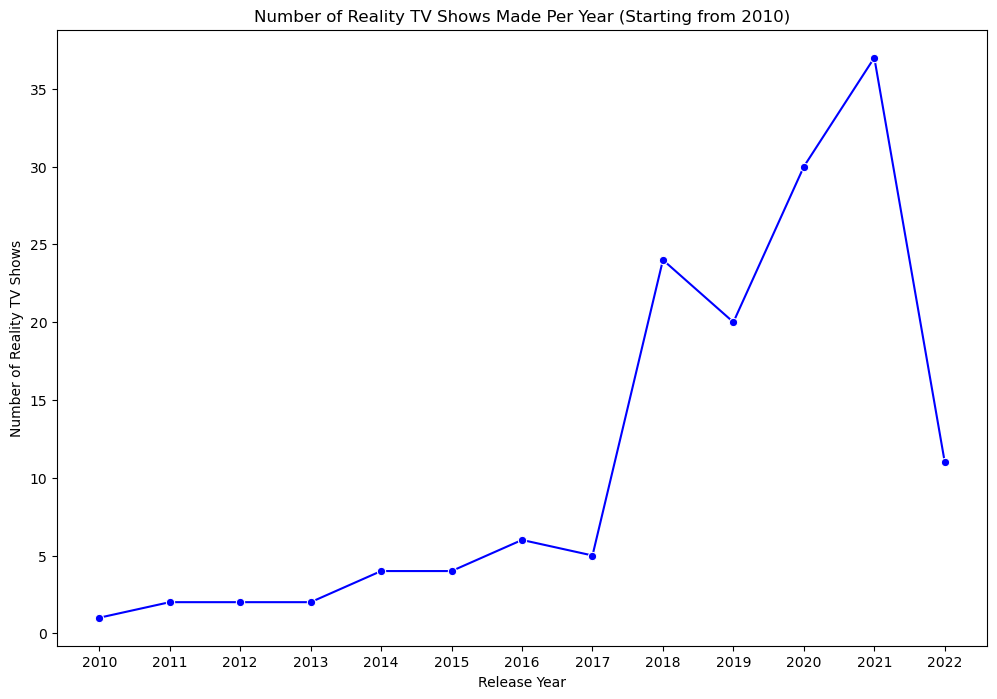

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter shows with the 'reality' genre
reality_shows = netflix_shows[netflix_shows['genres_x'].str.contains('reality', case=False, na=False)]

# Filter shows released from 2010 onwards
reality_shows = reality_shows[reality_shows['release_year'] >= 2010]

# Count the number of reality shows per year
reality_shows_per_year = reality_shows.groupby('release_year').size().reset_index(name='num_shows')

plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='num_shows', data=reality_shows_per_year, marker='o', color='blue')

# Adding labels and title
plt.title('Number of Reality TV Shows Made Per Year (Starting from 2010)')
plt.xlabel('Release Year')
plt.ylabel('Number of Reality TV Shows')
plt.xticks(reality_shows_per_year['release_year'])
plt.grid(False)

# Display the plot
plt.show()


In [3]:
#The line plot with markers shows the number of reality TV shows produced each year, starting from 2010.
#The count of reality shows has generally increased over the years, with a noticeable peak around 2020.
#The increasing trend in the number of reality TV shows suggests a growing audience interest in this genre.

In [4]:
from IPython.display import display

filtered_imdb_shows = imdb_data[imdb_data['type'] == 'SHOW']

# List of columns to remove
columns_to_remove = ['age_certification', 'runtime', 'production_countries', 'seasons', 'imdb_id']

# Remove the specified columns
filtered_imdb_shows = filtered_imdb_shows.drop(columns=columns_to_remove, errors='ignore')

# Remove rows where IMDb score is NaN
filtered_imdb_shows = filtered_imdb_shows.dropna(subset=['imdb_score'])

# Display the modified IMDb DataFrame
display(filtered_imdb_shows)



,title,type,release_year,genres,imdb_score,imdb_votes
5,Monty Python's Flying Circus,SHOW,1969,"['comedy', 'european']",8.8,72895.0
29,Monty Python's Fliegender Zirkus,SHOW,1972,['comedy'],8.1,2144.0
47,Seinfeld,SHOW,1989,['comedy'],8.9,302700.0
55,Knight Rider,SHOW,1982,"['action', 'scifi', 'crime', 'drama']",6.9,33760.0
57,Thomas & Friends,SHOW,1984,"['family', 'comedy', 'music', 'action', 'anima...",6.5,4948.0
...,...,...,...,...,...,...
5768,Christmas Flow,SHOW,2021,"['music', 'romance', 'comedy']",5.8,702.0
5770,Korean Cold Noodle Rhapsody,SHOW,2021,['documentation'],7.3,15.0
5785,Pitta Kathalu,SHOW,2021,"['drama', 'romance']",5.1,727.0
5796,The Big Day,SHOW,2021,"['reality', 'romance']",4.6,327.0


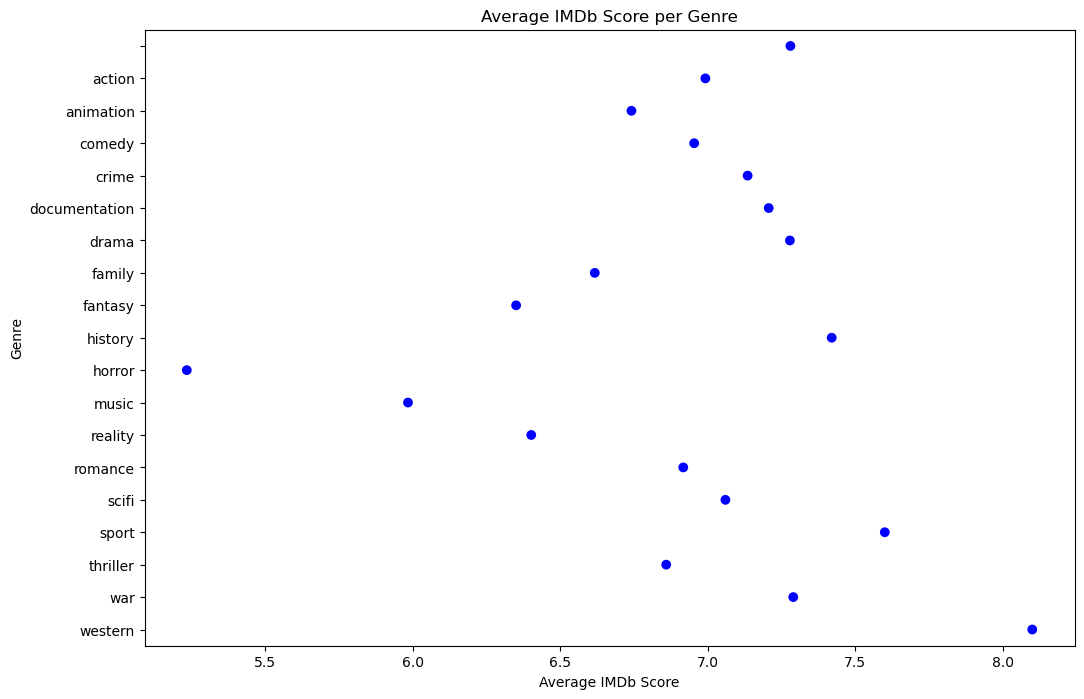

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first genre from the list of genres
filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')

# Group by genre and calculate the average IMDb score
genre_avg_imdb = filtered_imdb_shows.groupby('primary_genre')['imdb_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x='imdb_score', y='primary_genre', data=genre_avg_imdb, join=False, markers='o', color='b', scale=0.8)

# Set labels and title
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score per Genre')

# Show the plot
plt.show()

In [6]:
#The code extracted the primary genre from the list of genres for each TV show.
#A point plot was created to visualize the average IMDb score for each genre.
#In the point plot, each genre is represented by a single dot.
#The analysis provides insights into the average IMDb scores for different genres, helping understand audience perceptions.

C:\Users\maria\AppData\Local\Temp\ipykernel_9280\3053318250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')


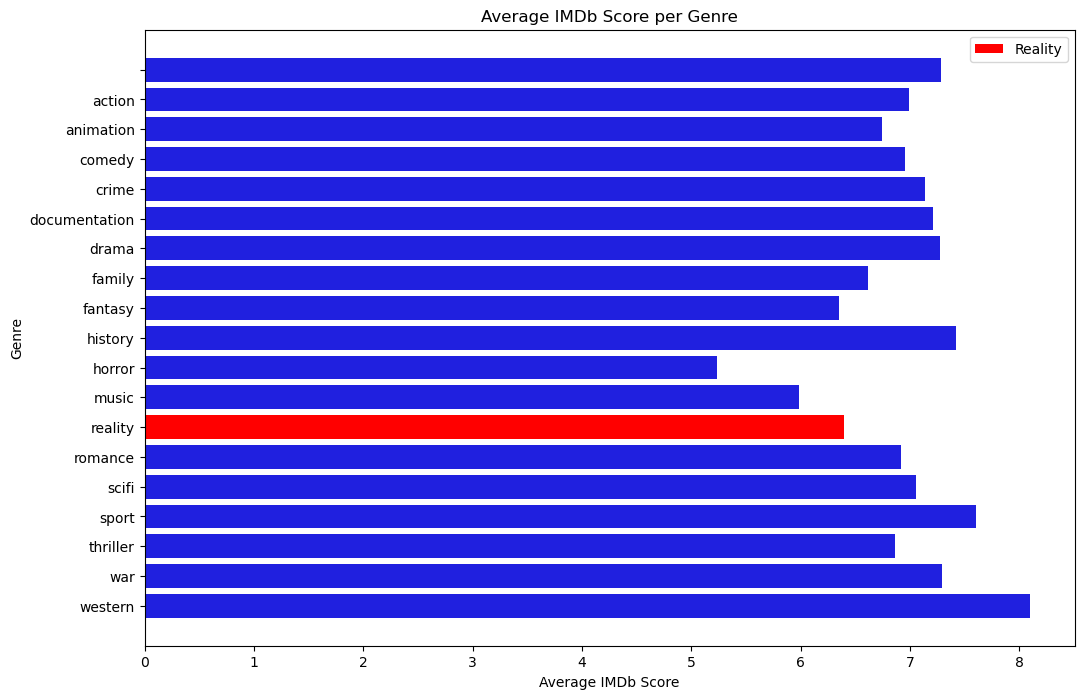

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')

# Group by genre and calculate the average IMDb score
genre_avg_imdb = filtered_imdb_shows.groupby('primary_genre')['imdb_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_score', y='primary_genre', data=genre_avg_imdb, color='b')

# Set labels and title
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score per Genre')

reality_index = genre_avg_imdb[genre_avg_imdb['primary_genre'] == 'reality'].index[0]
plt.barh(reality_index, genre_avg_imdb.loc[reality_index, 'imdb_score'], color='r', label='Reality')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [8]:
#The code extracted the primary genre from the list of genres for each TV show.
#Bar chart was created to visualize the average IMDb score for each genre.
#In the bar chart, genres are represented by bars.
#The analysis provides insights into the average IMDb scores for different genres, helping understand audience perceptions.

In [9]:
from scipy.stats import ttest_ind

# Split the DataFrame into reality and other genres
reality_data = filtered_imdb_shows[filtered_imdb_shows['genres'] == 'reality']
other_data = filtered_imdb_shows[filtered_imdb_shows['genres'] == 'other']

# Perform a t-test
t_statistic, p_value = ttest_ind(reality_data['imdb_score'].dropna(), other_data['imdb_score'].dropna(), equal_var=False)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")


T-statistic: nan
P-value: nan
There is no significant difference.


In [10]:
#A hypothesis test was conducted to compare the IMDb scores of reality TV shows with those of other genres.
#The test results (T-statistic, P-value) indicated no significant difference in IMDb scores between reality TV and other genres.
#The hypothesis test results suggest that reality TV shows, on average, do not have significantly different IMDb scores compared to other genres.

C:\Users\maria\AppData\Local\Temp\ipykernel_9280\3526226066.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(
C:\Users\maria\AppData\Local\Temp\ipykernel_9280\3526226066.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imdb_shows['genre_category'] = np.where(filtered_imdb_shows['primary_genre'] == 'reality', 'reality', 'other')


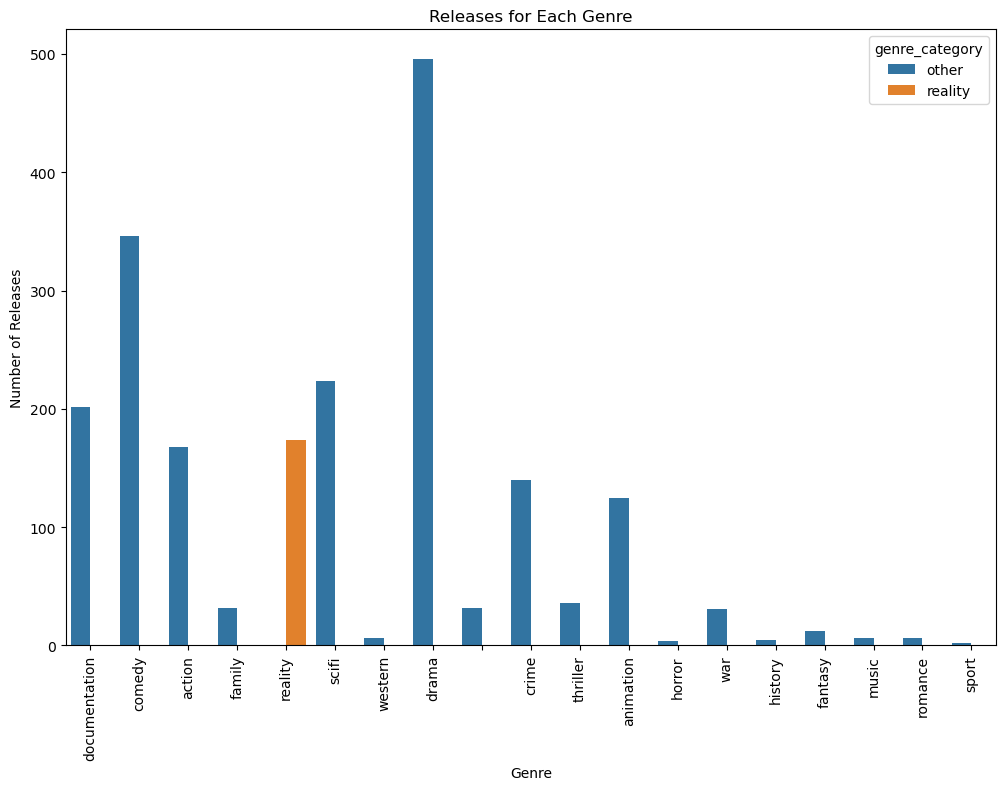

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast


filtered_imdb_shows = imdb_data[imdb_data['type'] == 'SHOW']

# Extract the first genre from the list of genres
filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(
    lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else ''
)

# Create a new column to identify if the genre is 'reality' or 'other'
filtered_imdb_shows['genre_category'] = np.where(filtered_imdb_shows['primary_genre'] == 'reality', 'reality', 'other')

plt.figure(figsize=(12, 8))
sns.countplot(x='primary_genre', data=filtered_imdb_shows, hue='genre_category')

plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Releases')
plt.title('Releases for Each Genre')

# Show the plot
plt.show()



In [12]:
#A bar chart was created to compare the number of releases for each genre, distinguishing between 'reality' and 'other' genres.
#The count of releases for each genre provides an overview of how prolific each genre is in terms of production.


C:\Users\maria\AppData\Local\Temp\ipykernel_9280\2953342239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(


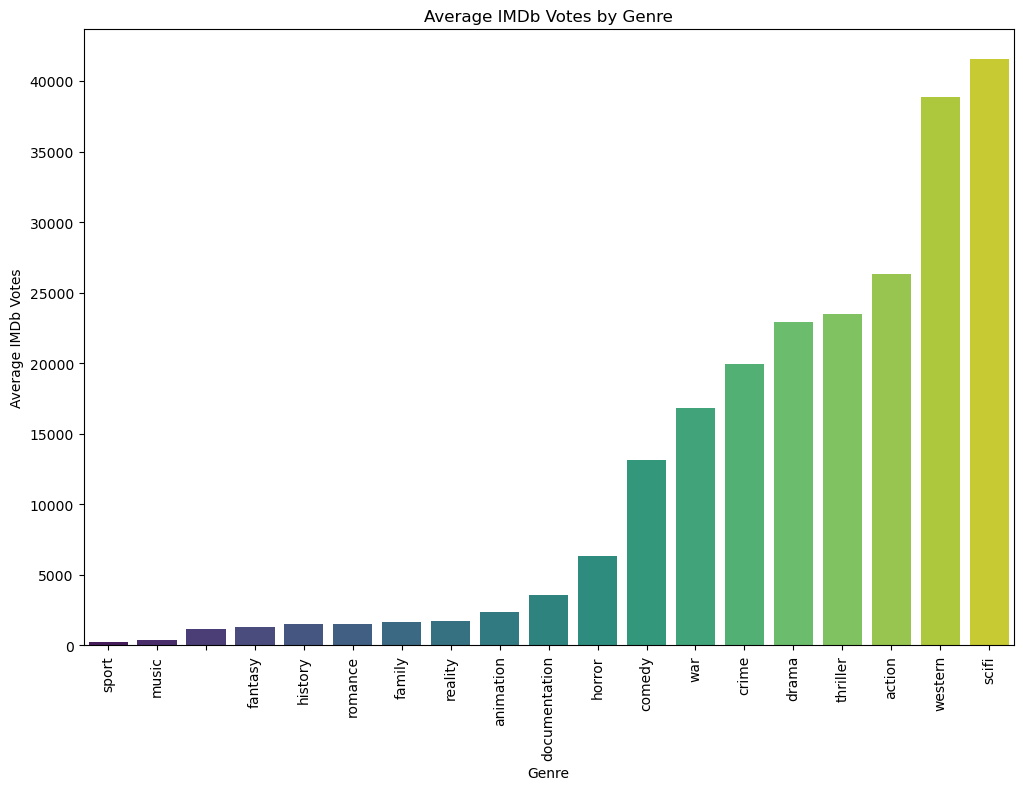

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

filtered_imdb_shows = imdb_data[imdb_data['type'] == 'SHOW']

# Extract the first genre from the list of genres
filtered_imdb_shows['primary_genre'] = filtered_imdb_shows['genres'].apply(
    lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else ''
)

# Calculate the average IMDb votes for each genre
genre_avg_votes = filtered_imdb_shows.groupby('primary_genre')['imdb_votes'].mean().reset_index()

genre_avg_votes = genre_avg_votes.sort_values(by='imdb_votes')


plt.figure(figsize=(12, 8))

sns.barplot(x='primary_genre', y='imdb_votes', data=genre_avg_votes, palette='viridis')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Average IMDb Votes')
plt.title('Average IMDb Votes by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [14]:
#A bar chart was generated to display the average IMDb votes for each genre in ascending order.
#Genres were sorted based on the average votes received.
#The visualizations aid decision-makers in understanding trends and making informed choices about content creation and distribution.